The database used is Istanbul Weather Data 2009-2019 taken from Kaggle: https://www.kaggle.com/datasets/vonline9/weather-istanbul-data-20092019

#### 1- Importing Library

In [3]:
# Data Manipulation Libraries
import numpy as np
import pandas as pd
import datetime as dt

# Splitting data to test and train 
from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.pipeline import Pipeline

from sklearn.utils import shuffle
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import LabelEncoder

# Evaluation Metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score


# Plotting Libraries
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import rcParams
%matplotlib inline

#### 2- Importing/Analyzing Data

In [4]:
data = pd.read_csv('Istanbul Weather Data.csv')

In [5]:
data.head(5)

,DateTime,Condition,Rain,MaxTemp,MinTemp,SunRise,SunSet,MoonRise,MoonSet,AvgWind,AvgHumidity,AvgPressure
0,02.09.2019,Partly cloudy,0.0,27,22,06:32:00,19:37:00,9:52:00,21:45:00,23,66,1012
1,01.09.2019,Partly cloudy,0.0,27,22,06:31:00,19:38:00,8:37:00,21:13:00,21,66,1011
2,31.08.2019,Patchy rain possible,0.5,26,22,06:30:00,19:40:00,7:21:00,20:40:00,22,63,1015
3,30.08.2019,Partly cloudy,0.0,27,22,06:29:00,19:42:00,6:4:00,20:5:00,20,64,1016
4,29.08.2019,Partly cloudy,0.0,27,23,06:27:00,19:43:00,4:47:00,19:26:00,24,61,1015


In [6]:
data.tail(5)

,DateTime,Condition,Rain,MaxTemp,MinTemp,SunRise,SunSet,MoonRise,MoonSet,AvgWind,AvgHumidity,AvgPressure
3891,05.01.2009,Overcast,4.32,5,3,08:29:00,17:50:00,0:41:00,1:57:00,15,97,1015
3892,04.01.2009,Mist,2.91,5,3,08:29:00,17:49:00,0:15:00,12:48:00,9,94,1014
3893,03.01.2009,Overcast,0.08,5,3,08:29:00,17:48:00,11:52:00,NaN,16,94,1021
3894,02.01.2009,Overcast,4.48,4,1,08:29:00,17:48:00,11:30:00,23:43:00,12,89,1021
3895,01.01.2009,Partly cloudy,0.23,5,2,08:29:00,17:47:00,11:9:00,22:39:00,10,90,1027


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3896 entries, 0 to 3895
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DateTime     3896 non-null   object 
 1   Condition    3896 non-null   object 
 2   Rain         3896 non-null   float64
 3   MaxTemp      3896 non-null   int64  
 4   MinTemp      3896 non-null   int64  
 5   SunRise      3896 non-null   object 
 6   SunSet       3896 non-null   object 
 7   MoonRise     3764 non-null   object 
 8   MoonSet      3765 non-null   object 
 9   AvgWind      3896 non-null   int64  
 10  AvgHumidity  3896 non-null   int64  
 11  AvgPressure  3896 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 365.4+ KB


In [8]:
# check datatypes
data.dtypes

DateTime        object
Condition       object
Rain           float64
MaxTemp          int64
MinTemp          int64
SunRise         object
SunSet          object
MoonRise        object
MoonSet         object
AvgWind          int64
AvgHumidity      int64
AvgPressure      int64
dtype: object

In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rain,3896.0,0.946794,2.558308,0.0,0.0,0.01,0.72,42.0
MaxTemp,3896.0,18.084189,7.613318,-3.0,12.0,18.00,25.00,37.0
MinTemp,3896.0,13.774897,6.865021,-5.0,8.0,14.00,20.00,26.0
AvgWind,3896.0,16.989220,7.950417,2.0,11.0,16.00,22.00,56.0
AvgHumidity,3896.0,71.414784,9.483500,40.0,65.0,71.00,78.00,97.0
AvgPressure,3896.0,1015.281314,6.284232,992.0,1011.0,1015.00,1019.00,1038.0


In [10]:
data.isnull().sum()

DateTime         0
Condition        0
Rain             0
MaxTemp          0
MinTemp          0
SunRise          0
SunSet           0
MoonRise       132
MoonSet        131
AvgWind          0
AvgHumidity      0
AvgPressure      0
dtype: int64

In [11]:
data.nunique()

DateTime       3896
Condition        26
Rain            550
MaxTemp          38
MinTemp          32
SunRise         178
SunSet          185
MoonRise       1343
MoonSet        1349
AvgWind          50
AvgHumidity      57
AvgPressure      44
dtype: int64

In [ ]:
plt.figure(figsize = (60,15))
sns.set_theme()
sns.countplot(x = 'Condition', data = data, palette ="ch:start=.2,rot=-.3")
plt.xlabel("Condition", fontweight = 'bold', size = 13)
plt.ylabel("Count", fontweight = 'bold', size = 13)
plt.show()

In [13]:
data['DateTime'] = pd.to_datetime(data['DateTime'], format = '%d.%m.%Y')
data['Year'] = data['DateTime'].dt.year
data["Month"] = data["DateTime"].dt.month
data

,DateTime,Condition,Rain,MaxTemp,MinTemp,SunRise,SunSet,MoonRise,MoonSet,AvgWind,AvgHumidity,AvgPressure,Year,Month
0,2019-09-02,Partly cloudy,0.00,27,22,06:32:00,19:37:00,9:52:00,21:45:00,23,66,1012,2019,9
1,2019-09-01,Partly cloudy,0.00,27,22,06:31:00,19:38:00,8:37:00,21:13:00,21,66,1011,2019,9
2,2019-08-31,Patchy rain possible,0.50,26,22,06:30:00,19:40:00,7:21:00,20:40:00,22,63,1015,2019,8
3,2019-08-30,Partly cloudy,0.00,27,22,06:29:00,19:42:00,6:4:00,20:5:00,20,64,1016,2019,8
4,2019-08-29,Partly cloudy,0.00,27,23,06:27:00,19:43:00,4:47:00,19:26:00,24,61,1015,2019,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3891,2009-01-05,Overcast,4.32,5,3,08:29:00,17:50:00,0:41:00,1:57:00,15,97,1015,2009,1
3892,2009-01-04,Mist,2.91,5,3,08:29:00,17:49:00,0:15:00,12:48:00,9,94,1014,2009,1
3893,2009-01-03,Overcast,0.08,5,3,08:29:00,17:48:00,11:52:00,NaN,16,94,1021,2009,1
3894,2009-01-02,Overcast,4.48,4,1,08:29:00,17:48:00,11:30:00,23:43:00,12,89,1021,2009,1


In [ ]:
plt.figure(figsize=(25,8))
sns.set_theme()
sns.lineplot(x = 'DateTime', y = 'MaxTemp', data = data)
plt.title("Maximum Temperature in Istanbul over the Years", fontsize = 20)
plt.xlabel("DateTime", fontweight = 'bold', fontsize = 20)
plt.ylabel("MaxTemp", fontweight = 'bold', fontsize = 20)
plt.show()

In [ ]:
plt.figure(figsize=(25,8))
sns.set_theme()
sns.lineplot(x = 'DateTime', y = 'MinTemp', data = data) 
plt.title("Minimum Temperature in Istanbul over the Years", fontsize = 20)
plt.xlabel("DateTime", fontweight = 'bold', fontsize = 20)
plt.ylabel("MinTemp", fontweight = 'bold', fontsize = 20)
plt.show()

In [ ]:
plt.figure(figsize=(25,10))
sns.set_theme()
sns.lineplot(x ='DateTime', y = 'AvgWind', data = data)
plt.title("Avg Wind Speed in Istanbul over the Years", fontsize = 20)
plt.xlabel("DateTime", fontweight = 'bold', fontsize = 20)
plt.ylabel("AvgWind", fontweight = 'bold', fontsize = 20)
plt.show()

In [ ]:
plt.figure(figsize=(25,10))
sns.set_theme()
sns.lineplot(x = 'DateTime', y = 'AvgPressure', data = data)
plt.title("Avg Pressure in Istanbul over the Years", fontsize = 20)
plt.xlabel("DateTime", fontweight = 'bold', fontsize = 20)
plt.ylabel("AvgPressure", fontweight = 'bold', fontsize = 20)
plt.show()

In [ ]:
plt.figure(figsize=(30,10))
sns.set_theme()
sns.lineplot(x = 'DateTime', y = 'AvgHumidity', data = data)
plt.title("Avg Humidity in Istanbul over the Years", fontsize = 20)
plt.xlabel("DateTime", fontweight = 'bold', fontsize = 20)
plt.ylabel("AvgHumidity", fontweight = 'bold', fontsize = 20)
plt.show()

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Temperature Change in Istanbul Over the Years")
sns.lineplot(data = data, x='Month', y='MaxTemp', hue='Year')
plt.show()

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Temperature Change in Istanbul Over the Years")
sns.lineplot(data = data, x='Month', y='MinTemp', hue='Year')
plt.show()

In [ ]:
plt.figure(figsize=(14,8))
sns.pairplot(data.drop('DateTime',axis=1),hue='Condition',palette="cubehelix")
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.catplot(x='MaxTemp',y ='Condition',data=data,palette="crest")
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.catplot(x='MinTemp',y ='Condition',data=data,palette="RdBu")
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.catplot(x='AvgWind',y ='Condition',data=data,palette="magma")
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.catplot(x='AvgPressure',y ='Condition',data=data,palette="viridis")
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.catplot(x='AvgHumidity',y ='Condition',data=data,palette="rocket")
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.catplot(x='Rain',y ='Condition',data=data,palette="rocket")
plt.show()

In [14]:
data = data.drop(['DateTime','SunRise','SunSet','MoonRise','MoonSet', 'Year', 'Month'],axis=1)

In [15]:
data["Condition"].unique()

array(['Partly cloudy', 'Patchy rain possible', 'Sunny',
       'Torrential rain shower', 'Cloudy', 'Overcast',
       'Heavy rain at times', 'Patchy light rain with thunder',
       'Light rain shower', 'Moderate or heavy rain shower',
       'Moderate or heavy rain with thunder', 'Light rain',
       'Light drizzle', 'Moderate rain', 'Light sleet',
       'Moderate rain at times', 'Patchy light drizzle',
       'Thundery outbreaks possible', 'Moderate or heavy sleet',
       'Heavy rain', 'Moderate or heavy snow showers', 'Moderate snow',
       'Mist', 'Blizzard', 'Light sleet showers', 'Fog'], dtype=object)

In [16]:
data['Condition'] = data['Condition'].replace(['Partly cloudy'], 'Cloudy')
data['Condition'] = data['Condition'].replace(['Patchy rain possible', 'Torrential rain shower', 'Heavy rain at times', 'Light rain shower', 'Moderate or heavy rain shower', 'Light rain',
       'Light drizzle', 'Moderate rain', 'Moderate rain at times', 'Patchy light drizzle', 'Heavy rain'], 'Rain')
data['Condition'] = data['Condition'].replace(['Patchy light rain with thunder', 'Moderate or heavy rain with thunder','Thundery outbreaks possible'], 'Rain with thunder')
data['Condition'] = data['Condition'].replace(['Light sleet' , 'Moderate or heavy sleet', 'Light sleet showers', 'Moderate or heavy snow showers', 'Moderate snow', 'Blizzard'], 'Snow')
data['Condition'] = data['Condition'].replace(['Mist', 'Fog'])

In [17]:
data['Condition'].unique()

array(['Cloudy', 'Rain', 'Sunny', 'Overcast', 'Rain with thunder', 'Snow'],
      dtype=object)

In [27]:
def LABEL_ENCODING(c1):
    label_encoder = LabelEncoder()
    data[c1]= label_encoder.fit_transform(data[c1])
    data[c1].unique()
LABEL_ENCODING("Condition")
data

,Condition,Rain,MaxTemp,MinTemp,AvgWind,AvgHumidity,AvgPressure
1536,0,1.20,23,19,23,73,1007
664,5,0.00,16,13,15,74,1023
3824,1,7.84,7,2,13,95,1013
1058,1,0.00,18,15,19,71,1020
1062,0,1.78,18,16,21,71,1014
...,...,...,...,...,...,...,...
2442,5,0.00,11,7,12,73,1024
1,0,0.00,27,22,21,66,1011
1290,0,0.04,9,6,11,79,1020
290,2,2.75,11,9,28,76,1024


In [28]:
data["Condition"].unique()

array([0, 5, 1, 3, 2, 4], dtype=int64)

In [29]:
x = data.drop('Condition',axis=1)
y = data['Condition']

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [32]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(3896, 6)
(2727, 6)
(1169, 6)
(3896,)
(2727,)
(1169,)


#### 3- Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
lrClassifier = LogisticRegression(random_state = 0)
lrClassifier.fit(X_train, y_train)

C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [34]:
lrprediction = lrClassifier.predict(X_test)

In [35]:
lrprediction[:100]

array([5, 1, 5, 5, 5, 0, 1, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 1, 0,
       0, 0, 5, 5, 5, 5, 1, 0, 5, 5, 0, 5, 5, 5, 5, 5, 0, 5, 1, 5, 5, 5,
       5, 5, 5, 0, 5, 5, 5, 5, 5, 1, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 0, 5,
       0, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5,
       5, 1, 5, 5, 5, 5, 5, 0, 0, 5, 5, 1], dtype=int64)

In [36]:
y_test[:100]

C:\Users\Assma Hijazi\AppData\Local\Temp\ipykernel_18668\3004544440.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:100]


1192    0
2775    0
86      0
5       5
1172    5
       ..
3820    0
2476    0
2589    5
1980    5
3018    1
Name: Condition, Length: 100, dtype: int64

In [37]:
lrAcc = accuracy_score(y_true=y_test, y_pred=lrprediction)
lrPrec = precision_score(y_true=y_test, y_pred=lrprediction, pos_label='positve', average='micro')
lrRecall = recall_score(y_true=y_test, y_pred=lrprediction, pos_label='positive', average='micro')
lrF1 = f1_score(y_true=y_test, y_pred=lrprediction, pos_label='positive', average='micro')
lrSpec = recall_score(y_true=y_test, y_pred=lrprediction, pos_label=0, average='micro')

C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positve') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 

In [38]:
print("Logistic Regresion Classifier Accuracy:{:.2f}%".format(lrAcc*100))
print("Logistic Regresion Classifier Precision:{:.2f}%".format(lrPrec*100))
print("Logistic Regresion Classifier Recall:{:.2f}%".format(lrRecall*100))
print("Logistic Regresion Classifier F1-Score:{:.2f}%".format(lrF1*100))
print("Logistic Regresion Classifier Specificity:{:.2f}%".format(lrSpec*100))

Logistic Regresion Classifier Accuracy:66.72%
Logistic Regresion Classifier Precision:66.72%
Logistic Regresion Classifier Recall:66.72%
Logistic Regresion Classifier F1-Score:66.72%
Logistic Regresion Classifier Specificity:66.72%


In [39]:
print(classification_report(y_test, lrprediction))

              precision    recall  f1-score   support

           0       0.52      0.29      0.37       336
           1       0.64      0.61      0.63       148
           2       0.40      0.08      0.13        26
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         3
           5       0.71      0.92      0.80       639

    accuracy                           0.67      1169
   macro avg       0.38      0.32      0.32      1169
weighted avg       0.63      0.67      0.63      1169



C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot: >

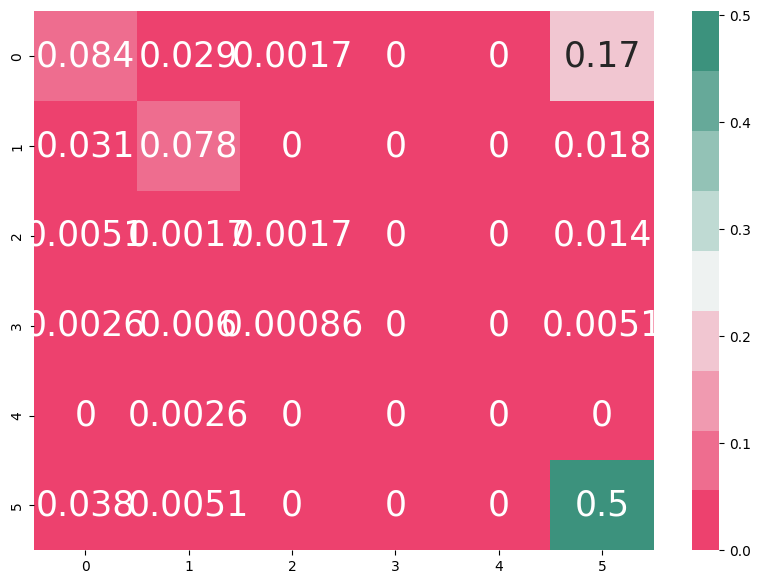

In [40]:
cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
lrcm = confusion_matrix(y_test, lrprediction)
sns.heatmap(lrcm/np.sum(lrcm), cmap = cmap1, annot = True, annot_kws = {'size':25})

#### 4- SVM

In [41]:
from sklearn.svm import SVC
svmClassifier = SVC(kernel = 'linear', random_state = 0)
svmClassifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [42]:
svmprediction = svmClassifier.predict(X_test)

In [43]:
svmprediction[:100]

array([5, 0, 5, 5, 5, 0, 1, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 1, 0,
       0, 0, 5, 5, 5, 5, 0, 0, 5, 5, 0, 5, 0, 5, 5, 5, 0, 5, 1, 0, 5, 5,
       5, 5, 5, 0, 5, 5, 5, 5, 5, 1, 5, 5, 0, 5, 5, 0, 5, 5, 5, 5, 0, 0,
       0, 0, 5, 5, 5, 5, 5, 5, 0, 5, 5, 0, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5,
       0, 0, 5, 0, 5, 5, 5, 0, 0, 5, 5, 0], dtype=int64)

In [44]:
y_test[:100]

C:\Users\Assma Hijazi\AppData\Local\Temp\ipykernel_18668\3004544440.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:100]


1192    0
2775    0
86      0
5       5
1172    5
       ..
3820    0
2476    0
2589    5
1980    5
3018    1
Name: Condition, Length: 100, dtype: int64

In [45]:
svmAcc = accuracy_score(y_true=y_test, y_pred=svmprediction)
svmPrec = precision_score(y_true=y_test, y_pred=svmprediction, pos_label='positive', average='micro')
svmRecall = recall_score(y_true=y_test, y_pred=svmprediction, pos_label='positive', average='micro')
svmF1 = f1_score(y_true=y_test, y_pred=svmprediction, pos_label='positive', average='micro')
svmSpec = recall_score(y_true=y_test, y_pred=svmprediction, pos_label=0, average='micro')

C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to

In [46]:
print("SVM Classifier Accuracy:{:.2f}%".format(svmAcc*100))
print("SVM Classifier Precision:{:.2f}%".format(svmPrec*100))
print("SVM Classifier Recall:{:.2f}%".format(svmRecall*100))
print("SVM Classifier F1-Score:{:.2f}%".format(svmF1*100))
print("SVM Classifier Specificity:{:.2f}%".format(svmSpec*100))

SVM Classifier Accuracy:67.49%
SVM Classifier Precision:67.49%
SVM Classifier Recall:67.49%
SVM Classifier F1-Score:67.49%
SVM Classifier Specificity:67.49%


In [47]:
print(classification_report(y_test, svmprediction))

              precision    recall  f1-score   support

           0       0.49      0.40      0.44       336
           1       0.71      0.54      0.62       148
           2       0.50      0.08      0.13        26
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         3
           5       0.74      0.90      0.81       639

    accuracy                           0.67      1169
   macro avg       0.41      0.32      0.33      1169
weighted avg       0.64      0.67      0.65      1169



C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot: >

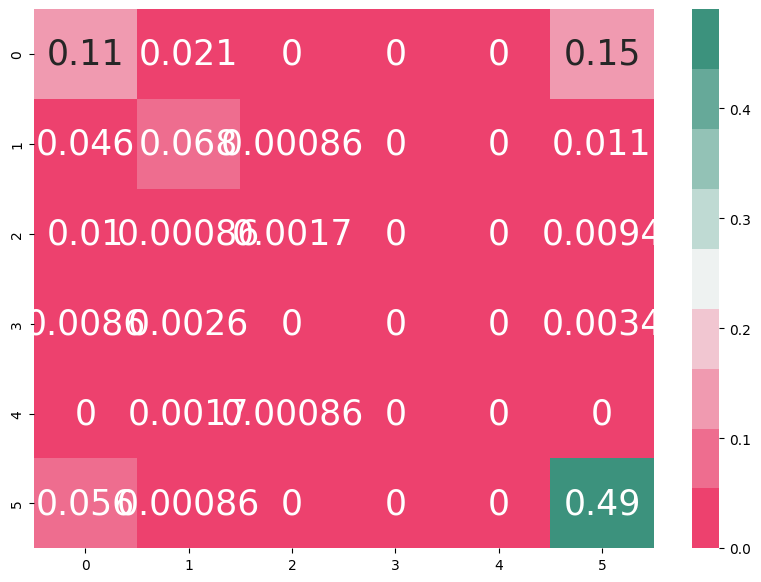

In [48]:
cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
svmcm = confusion_matrix(y_test, svmprediction)
sns.heatmap(svmcm/np.sum(svmcm), cmap = cmap1, annot = True, annot_kws = {'size':25})

#### 5- KNN 

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knnClassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knnClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
knnprediction = knnClassifier.predict(X_test)

In [51]:
knnprediction[:100]

array([5, 0, 5, 5, 5, 0, 2, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 1, 0,
       0, 5, 5, 5, 5, 0, 1, 0, 5, 0, 0, 5, 0, 5, 5, 5, 5, 5, 0, 5, 5, 5,
       5, 5, 1, 5, 0, 5, 5, 5, 5, 1, 5, 5, 5, 0, 5, 5, 5, 0, 5, 5, 5, 5,
       0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 0, 1, 5, 0, 5, 5, 5, 5, 5, 5, 5,
       0, 0, 5, 5, 5, 5, 0, 5, 0, 5, 5, 0], dtype=int64)

In [52]:
y_test[:100]

C:\Users\Assma Hijazi\AppData\Local\Temp\ipykernel_18668\3004544440.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:100]


1192    0
2775    0
86      0
5       5
1172    5
       ..
3820    0
2476    0
2589    5
1980    5
3018    1
Name: Condition, Length: 100, dtype: int64

In [53]:
knnAcc = accuracy_score(y_true=y_test, y_pred=knnprediction)
knnPrec = precision_score(y_true=y_test, y_pred=knnprediction, pos_label='positive', average='micro')
knnRecall = recall_score(y_true=y_test, y_pred=knnprediction, pos_label='positive', average='micro')
knnF1 = f1_score(y_true=y_test, y_pred=knnprediction, pos_label='positive', average='micro')
knnSpec = recall_score(y_true=y_test, y_pred=knnprediction, pos_label=0, average='micro')

C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to

In [54]:
print("KNN Classifier Accuracy:{:.2f}%".format(knnAcc*100))
print("KNN Classifier Precision:{:.2f}%".format(knnPrec*100))
print("KNN Classifier Recall:{:.2f}%".format(knnRecall*100))
print("KNN Classifier F1-Score:{:.2f}%".format(knnF1*100))
print("KNN Classifier Specificity:{:.2f}%".format(knnSpec*100))

KNN Classifier Accuracy:64.24%
KNN Classifier Precision:64.24%
KNN Classifier Recall:64.24%
KNN Classifier F1-Score:64.24%
KNN Classifier Specificity:64.24%


In [55]:
print(classification_report(y_test, knnprediction))

              precision    recall  f1-score   support

           0       0.46      0.41      0.43       336
           1       0.62      0.47      0.54       148
           2       0.19      0.12      0.14        26
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         3
           5       0.73      0.85      0.78       639

    accuracy                           0.64      1169
   macro avg       0.33      0.31      0.32      1169
weighted avg       0.62      0.64      0.62      1169



C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot: >

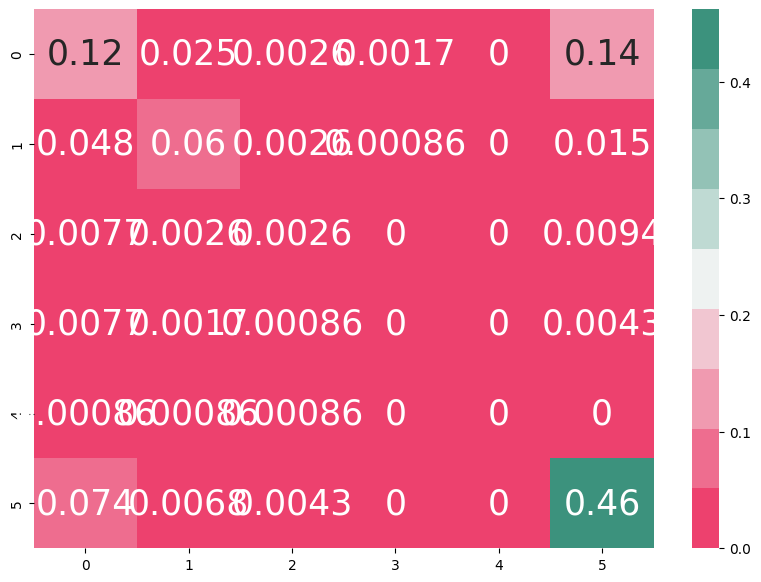

In [56]:
cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
knncm = confusion_matrix(y_test, knnprediction)
sns.heatmap(knncm/np.sum(knncm), cmap = cmap1, annot = True, annot_kws = {'size':25})

#### 6- Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB
nbClassifier = GaussianNB()
nbClassifier.fit(X_train, y_train)

GaussianNB()

In [58]:
nbprediction = nbClassifier.predict(X_test)

In [59]:
nbprediction[:100]

array([5, 1, 5, 5, 5, 0, 4, 5, 5, 5, 5, 5, 5, 1, 5, 0, 5, 5, 5, 5, 1, 0,
       0, 0, 5, 5, 5, 5, 1, 0, 5, 0, 0, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5,
       5, 5, 5, 0, 5, 0, 5, 0, 5, 4, 5, 5, 0, 0, 5, 5, 5, 0, 5, 5, 0, 5,
       0, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 5, 0, 5, 5, 5, 5, 5, 5, 5,
       0, 1, 5, 0, 5, 5, 5, 1, 5, 5, 5, 5], dtype=int64)

In [60]:
y_test[:100]

C:\Users\Assma Hijazi\AppData\Local\Temp\ipykernel_18668\3004544440.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:100]


1192    0
2775    0
86      0
5       5
1172    5
       ..
3820    0
2476    0
2589    5
1980    5
3018    1
Name: Condition, Length: 100, dtype: int64

In [61]:
nbAcc = accuracy_score(y_true=y_test, y_pred=nbprediction)
nbPrec = precision_score(y_true=y_test, y_pred=nbprediction, pos_label='positive', average='micro')
nbRecall = recall_score(y_true=y_test, y_pred=nbprediction, pos_label='positive', average='micro')
nbF1 = f1_score(y_true=y_test, y_pred=nbprediction, pos_label='positive', average='micro')
nbSpec = recall_score(y_true=y_test, y_pred=nbprediction, pos_label=0, average='micro')

C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to

In [62]:
print("Naive Bayes Classifier Accuracy:{:.2f}%".format(nbAcc*100))
print("Naive Bayes Classifier Precision:{:.2f}%".format(nbPrec*100))
print("Naive Bayes Classifier Recall:{:.2f}%".format(nbRecall*100))
print("Naive Bayes Classifier F1-Score:{:.2f}%".format(nbF1*100))
print("Naive Bayes Classifier Specificity:{:.2f}%".format(nbSpec*100))

Naive Bayes Classifier Accuracy:63.64%
Naive Bayes Classifier Precision:63.64%
Naive Bayes Classifier Recall:63.64%
Naive Bayes Classifier F1-Score:63.64%
Naive Bayes Classifier Specificity:63.64%


In [63]:
print(classification_report(y_test, nbprediction))

              precision    recall  f1-score   support

           0       0.45      0.31      0.37       336
           1       0.58      0.59      0.59       148
           2       0.19      0.12      0.14        26
           3       0.25      0.06      0.10        17
           4       0.18      0.67      0.29         3
           5       0.72      0.85      0.78       639

    accuracy                           0.64      1169
   macro avg       0.40      0.43      0.38      1169
weighted avg       0.61      0.64      0.61      1169



<AxesSubplot: >

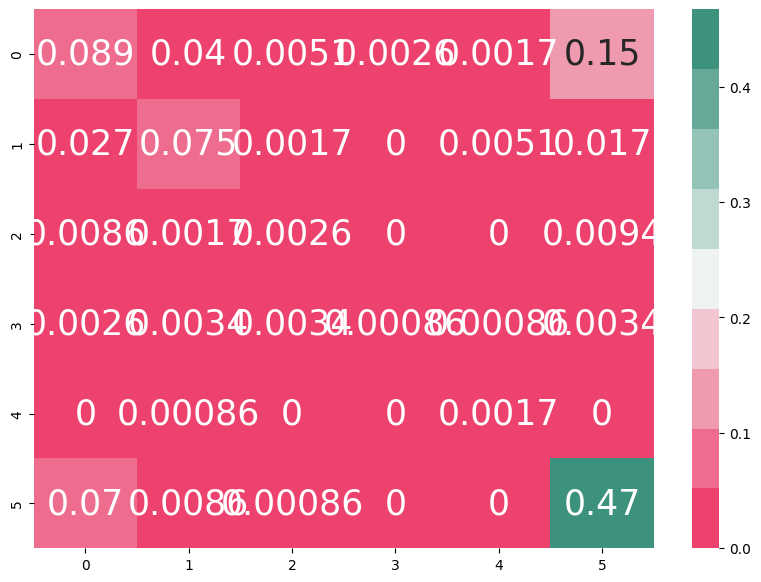

In [64]:
cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
nbcm = confusion_matrix(y_test, nbprediction)
sns.heatmap(nbcm/np.sum(nbcm), cmap = cmap1, annot = True, annot_kws = {'size':25})

#### 7- Decision Tree Classifier

In [65]:
from sklearn.tree import DecisionTreeClassifier
dtClassifier = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
dtClassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [66]:
dtprediction = dtClassifier.predict(X_test)

In [67]:
dtprediction[:100]

array([5, 1, 5, 5, 5, 0, 1, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 1, 0,
       0, 0, 5, 5, 5, 0, 1, 0, 5, 0, 0, 5, 0, 5, 5, 5, 0, 5, 1, 0, 5, 5,
       5, 5, 5, 0, 5, 0, 5, 5, 5, 1, 5, 5, 0, 0, 5, 0, 5, 5, 5, 5, 1, 5,
       0, 0, 5, 5, 5, 5, 0, 5, 5, 5, 5, 0, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5,
       0, 0, 5, 5, 5, 5, 5, 1, 5, 5, 0, 5], dtype=int64)

In [68]:
y_test[:100]

C:\Users\Assma Hijazi\AppData\Local\Temp\ipykernel_18668\3004544440.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:100]


1192    0
2775    0
86      0
5       5
1172    5
       ..
3820    0
2476    0
2589    5
1980    5
3018    1
Name: Condition, Length: 100, dtype: int64

In [69]:
dtAcc = accuracy_score(y_true=y_test, y_pred=dtprediction)
dtPrec = precision_score(y_true=y_test, y_pred=dtprediction, pos_label='positive', average='micro')
dtRecall = recall_score(y_true=y_test, y_pred=dtprediction, pos_label='positive', average='micro')
dtF1 = f1_score(y_true=y_test, y_pred=dtprediction, pos_label='positive', average='micro')
dtSpec = recall_score(y_true=y_test, y_pred=dtprediction, pos_label=0, average='micro')

C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to

In [70]:
print("Decision Tree Classifier Accuracy:{:.2f}%".format(dtAcc*100))
print("Decision Tree Classifier Precision:{:.2f}%".format(dtPrec*100))
print("Decision Tree Classifier Recall:{:.2f}%".format(dtRecall*100))
print("Decision Tree Classifier F1-Score:{:.2f}%".format(dtF1*100))
print("Decision Tree Classifier Specificity:{:.2f}%".format(dtSpec*100))

Decision Tree Classifier Accuracy:64.16%
Decision Tree Classifier Precision:64.16%
Decision Tree Classifier Recall:64.16%
Decision Tree Classifier F1-Score:64.16%
Decision Tree Classifier Specificity:64.16%


In [71]:
print(classification_report(y_test, dtprediction))

              precision    recall  f1-score   support

           0       0.44      0.37      0.40       336
           1       0.63      0.42      0.50       148
           2       0.00      0.00      0.00        26
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         3
           5       0.72      0.88      0.79       639

    accuracy                           0.64      1169
   macro avg       0.30      0.28      0.28      1169
weighted avg       0.60      0.64      0.61      1169



C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot: >

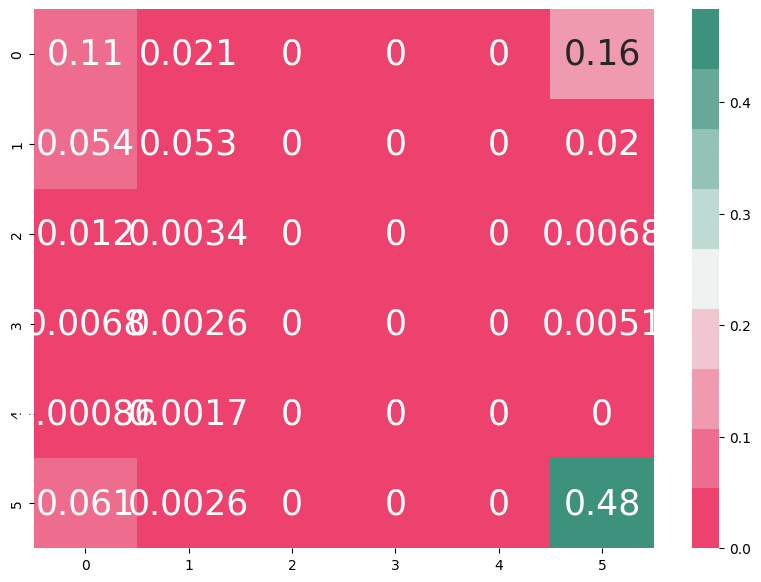

In [72]:
cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
dtcm = confusion_matrix(y_test, dtprediction)
sns.heatmap(dtcm/np.sum(dtcm), cmap = cmap1, annot = True, annot_kws = {'size':25})

#### 8- Random Forest 

In [73]:
from sklearn.ensemble import RandomForestClassifier
rfClassifier= RandomForestClassifier(n_estimators =40, random_state = 0)
rfClassifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=40, random_state=0)

In [74]:
rfprediction = rfClassifier.predict(X_test)

In [75]:
rfprediction[:100]

array([5, 0, 5, 5, 5, 0, 2, 5, 5, 5, 5, 5, 5, 0, 5, 5, 0, 5, 5, 5, 1, 0,
       0, 0, 5, 5, 5, 5, 1, 0, 5, 0, 0, 5, 5, 5, 5, 5, 0, 5, 1, 0, 5, 5,
       5, 5, 0, 0, 5, 0, 5, 5, 5, 1, 5, 5, 0, 0, 5, 0, 5, 0, 5, 5, 0, 0,
       0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5,
       0, 0, 5, 5, 5, 5, 5, 0, 5, 5, 5, 0], dtype=int64)

In [76]:
y_test[:100]

C:\Users\Assma Hijazi\AppData\Local\Temp\ipykernel_18668\3004544440.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:100]


1192    0
2775    0
86      0
5       5
1172    5
       ..
3820    0
2476    0
2589    5
1980    5
3018    1
Name: Condition, Length: 100, dtype: int64

In [77]:
rfAcc = accuracy_score(y_true=y_test, y_pred=rfprediction)
rfPrec = precision_score(y_true=y_test, y_pred=rfprediction, pos_label='positive', average='micro')
rfRecall = recall_score(y_true=y_test, y_pred=rfprediction, pos_label='positive', average='micro')
rfF1 = f1_score(y_true=y_test, y_pred=rfprediction, pos_label='positive', average='micro')
rfSpec = recall_score(y_true=y_test, y_pred=rfprediction, pos_label=0, average='micro')

C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to

In [78]:
print("Random Forest Classifier Accuracy:{:.2f}%".format(rfAcc*100))
print("Random Forest Classifier Precision:{:.2f}%".format(rfPrec*100))
print("Random Forest Classifier Recall:{:.2f}%".format(rfRecall*100))
print("Random Forest Classifier F1-Score:{:.2f}%".format(rfF1*100))
print("Random Forest Classifier Specificity:{:.2f}%".format(rfSpec*100))

Random Forest Classifier Accuracy:65.70%
Random Forest Classifier Precision:65.70%
Random Forest Classifier Recall:65.70%
Random Forest Classifier F1-Score:65.70%
Random Forest Classifier Specificity:65.70%


In [79]:
print(classification_report(y_test, rfprediction))

              precision    recall  f1-score   support

           0       0.47      0.44      0.46       336
           1       0.67      0.47      0.55       148
           2       0.10      0.04      0.06        26
           3       0.50      0.06      0.11        17
           4       0.00      0.00      0.00         3
           5       0.74      0.86      0.79       639

    accuracy                           0.66      1169
   macro avg       0.41      0.31      0.33      1169
weighted avg       0.64      0.66      0.64      1169



C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot: >

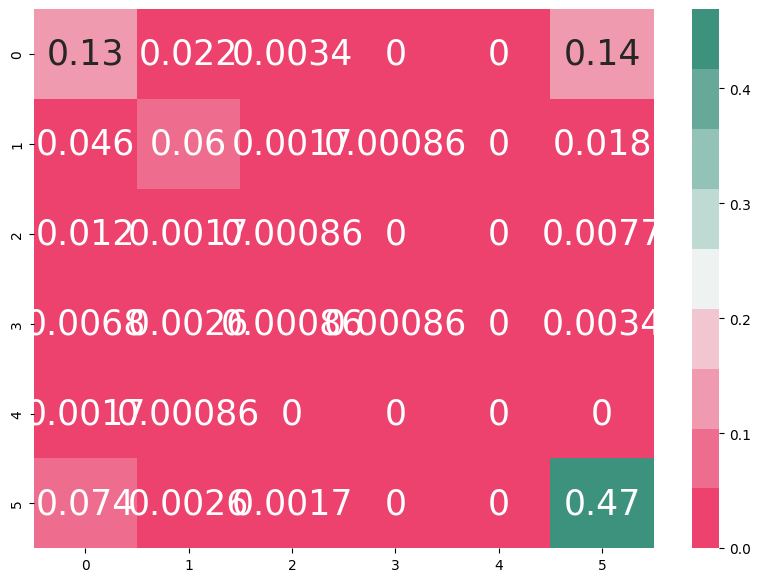

In [80]:
cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
rfcm = confusion_matrix(y_test, rfprediction)
sns.heatmap(rfcm/np.sum(rfcm), cmap = cmap1, annot = True, annot_kws = {'size':25})

#### 9- XGBOOST

In [81]:
from xgboost import XGBClassifier
xgbClassifier = XGBClassifier(n_estimators = 500, learning_rate = 0.1, max_depth = 30)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
xgby_train = le.fit_transform(y_train)
xgbClassifier.fit(X_train, xgby_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=30, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

In [82]:
xgbprediction = xgbClassifier.predict(X_test)

In [83]:
xgbprediction[:100]

array([0, 0, 5, 5, 5, 0, 2, 5, 5, 5, 5, 5, 5, 1, 0, 5, 0, 5, 5, 5, 1, 0,
       0, 5, 5, 5, 5, 5, 1, 3, 5, 0, 0, 5, 0, 5, 5, 5, 0, 5, 1, 5, 5, 5,
       5, 5, 5, 0, 5, 0, 5, 5, 5, 1, 5, 5, 5, 0, 5, 0, 5, 0, 5, 5, 0, 0,
       0, 0, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       0, 0, 5, 5, 5, 5, 5, 1, 5, 5, 5, 0], dtype=int64)

In [84]:
y_test[:100]

C:\Users\Assma Hijazi\AppData\Local\Temp\ipykernel_18668\3004544440.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:100]


1192    0
2775    0
86      0
5       5
1172    5
       ..
3820    0
2476    0
2589    5
1980    5
3018    1
Name: Condition, Length: 100, dtype: int64

In [85]:
xgbAcc = accuracy_score(y_true=y_test, y_pred=xgbprediction)
xgbPrec = precision_score(y_true=y_test, y_pred=xgbprediction, pos_label='positive', average='micro')
xgbRecall = recall_score(y_true=y_test, y_pred=xgbprediction, pos_label='positive', average='micro')
xgbF1 = f1_score(y_true=y_test, y_pred=xgbprediction, pos_label='positive', average='micro')
xgbSpec = recall_score(y_true=y_test, y_pred=xgbprediction, pos_label=0, average='micro')

C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to

In [86]:
print("XGBoost Classifier Accuracy:{:.2f}%".format(xgbAcc*100))
print("XGBoost Classifier Precision:{:.2f}%".format(xgbPrec*100))
print("XGBoost Classifier Recall:{:.2f}%".format(xgbRecall*100))
print("XGBoost Classifier F1-Score:{:.2f}%".format(xgbF1*100))
print("XGBoost Classifier Specificity:{:.2f}%".format(xgbSpec*100))

XGBoost Classifier Accuracy:65.27%
XGBoost Classifier Precision:65.27%
XGBoost Classifier Recall:65.27%
XGBoost Classifier F1-Score:65.27%
XGBoost Classifier Specificity:65.27%


In [87]:
print(classification_report(y_test, xgbprediction))

              precision    recall  f1-score   support

           0       0.47      0.39      0.43       336
           1       0.64      0.55      0.59       148
           2       0.10      0.08      0.09        26
           3       0.14      0.06      0.08        17
           4       0.00      0.00      0.00         3
           5       0.74      0.86      0.80       639

    accuracy                           0.65      1169
   macro avg       0.35      0.32      0.33      1169
weighted avg       0.63      0.65      0.64      1169



C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot: >

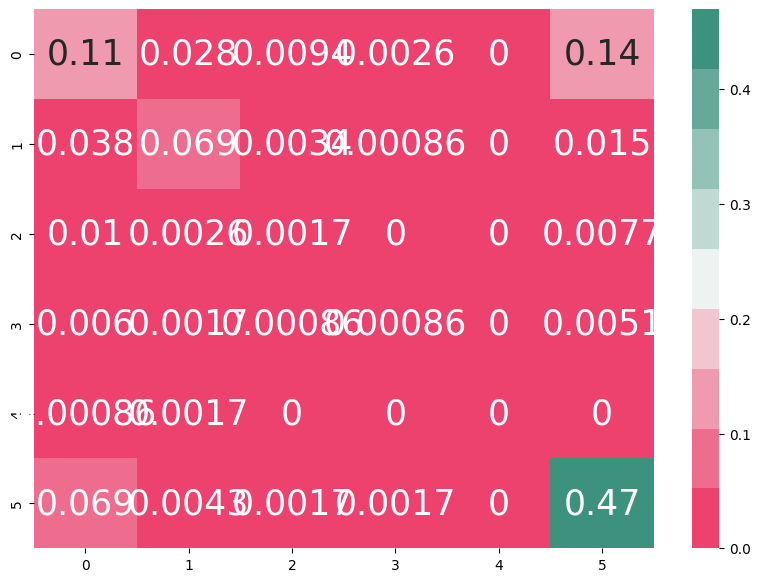

In [88]:
cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
xgbcm = confusion_matrix(y_test, xgbprediction)
sns.heatmap(xgbcm/np.sum(xgbcm), cmap = cmap1, annot = True, annot_kws = {'size':25})

#### 10- Gradient Boosting Classifier

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
gbcClassifier=GradientBoostingClassifier(subsample=0.5,n_estimators=500,max_depth=5,max_leaf_nodes=30)
gbcClassifier.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, max_leaf_nodes=30, n_estimators=500,
                           subsample=0.5)

In [90]:
gbcprediction = gbcClassifier.predict(X_test)

In [91]:
gbcprediction[:100]

array([3, 4, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 1, 1,
       4, 1, 3, 3, 3, 3, 5, 4, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 5, 3, 3, 3,
       3, 4, 3, 4, 3, 1, 3, 1, 3, 5, 3, 3, 4, 3, 3, 3, 1, 4, 3, 3, 1, 3,
       1, 4, 3, 3, 3, 3, 4, 3, 4, 1, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 5, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3], dtype=int64)

In [92]:
y_test[:100]

C:\Users\Assma Hijazi\AppData\Local\Temp\ipykernel_18668\3004544440.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:100]


1192    0
2775    0
86      0
5       5
1172    5
       ..
3820    0
2476    0
2589    5
1980    5
3018    1
Name: Condition, Length: 100, dtype: int64

In [93]:
gbcAcc = accuracy_score(y_true=y_test, y_pred=gbcprediction)
gbcPrec = precision_score(y_true=y_test, y_pred=gbcprediction, pos_label='positive', average='micro')
gbcRecall = recall_score(y_true=y_test, y_pred=gbcprediction, pos_label='positive', average='micro')
gbcF1 = f1_score(y_true=y_test, y_pred=gbcprediction, pos_label='positive', average='micro')
gbcSpec = recall_score(y_true=y_test, y_pred=gbcprediction, pos_label=0, average='micro')

C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to

In [94]:
print("Gradient Boost Classifier Accuracy:{:.2f}%".format(gbcAcc*100))
print("Gradient Boost Classifier Precision:{:.2f}%".format(gbcPrec*100))
print("Gradient Boost Classifier Recall:{:.2f}%".format(gbcRecall*100))
print("Gradient Boost Classifier F1-Score:{:.2f}%".format(gbcF1*100))
print("Gradient Boost Classifier Specificity:{:.2f}%".format(gbcSpec*100))

Gradient Boost Classifier Accuracy:3.76%
Gradient Boost Classifier Precision:3.76%
Gradient Boost Classifier Recall:3.76%
Gradient Boost Classifier F1-Score:3.76%
Gradient Boost Classifier Specificity:3.76%


In [95]:
print(classification_report(y_test, gbcprediction))

              precision    recall  f1-score   support

           0       0.67      0.01      0.01       336
           1       0.19      0.24      0.21       148
           2       0.00      0.00      0.00        26
           3       0.00      0.12      0.01        17
           4       0.00      0.00      0.00         3
           5       0.06      0.01      0.01       639

    accuracy                           0.04      1169
   macro avg       0.15      0.06      0.04      1169
weighted avg       0.25      0.04      0.04      1169



<AxesSubplot: >

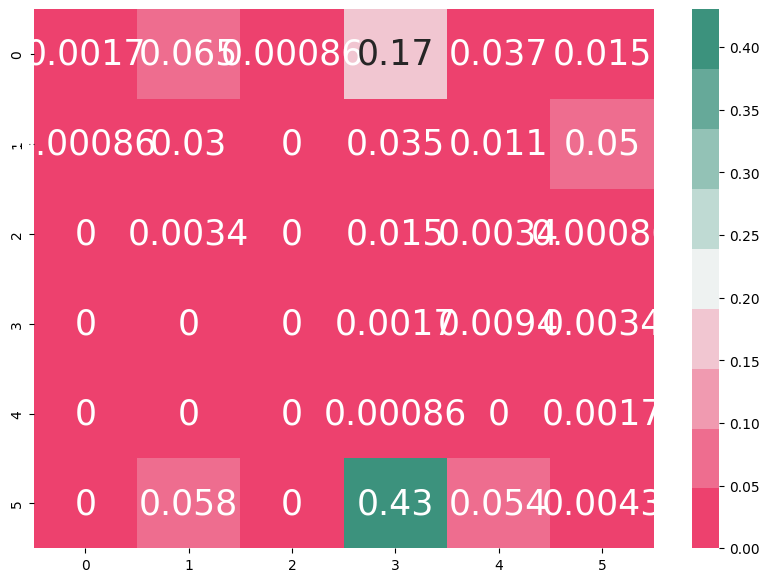

In [96]:
cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
gbccm = confusion_matrix(y_test, gbcprediction)
sns.heatmap(gbccm/np.sum(gbccm), cmap = cmap1, annot = True, annot_kws = {'size':25})

#### 11-ANN

In [97]:
# from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
from keras.optimizers import Adam
from tensorflow.keras import regularizers

In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler_min_max = MinMaxScaler()

X_train = scaler_min_max.fit_transform(X_train)
X_test = scaler_min_max.transform(X_test)

In [99]:
early_stopping = callbacks.EarlyStopping(
#     min_delta=0.001, # minimium amount of change to count as an improvement
    monitor='val_loss',
    mode='min',
    verbose=1,
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True)

In [128]:
in_dim = len(data.columns)-1

ANNmodel = Sequential()

ANNmodel.add(Dense(units = 8, activation = 'relu', input_dim = in_dim))
ANNmodel.add(Dropout(0.25))
ANNmodel.add(Dense(units = 150, activation = 'relu'))
ANNmodel.add(Dense(units = 75, activation = 'relu'))
# ANNmodel.add(Dense(units = 75, activation = 'relu'))
ANNmodel.add(Dropout(0.5))
ANNmodel.add(Dense(units = 6, activation = 'softmax'))

In [129]:
ANNmodel.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [130]:
history = ANNmodel.fit(X_train, y_train, batch_size = 25, epochs = 80, callbacks=[early_stopping], validation_split=0.25)
# history = ANNmodel.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size = 32, epochs = 200, callbacks =[early_stopping])

Epoch 1/80


C:\Users\Assma Hijazi\Python\Python3108\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


82/82 [==============================] - 1s 5ms/step - loss: 1.2033 - accuracy: 0.5648 - val_loss: 1.0275 - val_accuracy: 0.5748
Epoch 2/80
82/82 [==============================] - 0s 3ms/step - loss: 1.0300 - accuracy: 0.5883 - val_loss: 0.9754 - val_accuracy: 0.5748
Epoch 3/80
82/82 [==============================] - 0s 3ms/step - loss: 1.0039 - accuracy: 0.5961 - val_loss: 0.9413 - val_accuracy: 0.6158
Epoch 4/80
82/82 [==============================] - 0s 3ms/step - loss: 0.9659 - accuracy: 0.6200 - val_loss: 0.9237 - val_accuracy: 0.6686
Epoch 5/80
82/82 [==============================] - 0s 3ms/step - loss: 0.9502 - accuracy: 0.6269 - val_loss: 0.9023 - val_accuracy: 0.6452
Epoch 6/80
82/82 [==============================] - 0s 3ms/step - loss: 0.9350 - accuracy: 0.6264 - val_loss: 0.8990 - val_accuracy: 0.6496
Epoch 7/80
82/82 [==============================] - 0s 3ms/step - loss: 0.9274 - accuracy: 0.6421 - val_loss: 0.8929 - val_accuracy: 0.6701
Epoch 8/80
82/82 [=============

In [131]:
ANNprediction = ANNmodel.predict(X_test, batch_size = 25, verbose = 0)
ANNprediction = sc.fit_transform(ANNprediction)
ANNprediction

array([[ 1.3063849 , -0.2194867 , -0.07895695,  0.23349443, -0.37433475,
        -0.3644118 ],
       [ 1.184161  ,  1.5724403 , -0.15978073,  0.6568824 ,  0.4488344 ,
        -1.560046  ],
       [-1.5327023 , -0.6849708 , -0.57686055, -0.9203481 , -0.46298695,
         1.2311916 ],
       ...,
       [-0.5875217 , -0.592624  , -0.5145627 , -0.8042412 , -0.45628   ,
         0.77242047],
       [-0.2837206 , -0.5389833 , -0.40390435, -0.70171326, -0.446722  ,
         0.591114  ],
       [-0.18291743, -0.61014444,  0.04770828,  0.14123054, -0.45214146,
         0.48632875]], dtype=float32)

In [132]:
ANNmodel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 56        
                                                                 
 dropout_6 (Dropout)         (None, 8)                 0         
                                                                 
 dense_13 (Dense)            (None, 150)               1350      
                                                                 
 dense_14 (Dense)            (None, 75)                11325     
                                                                 
 dropout_7 (Dropout)         (None, 75)                0         
                                                                 
 dense_15 (Dense)            (None, 6)                 456       
                                                                 
Total params: 13,187
Trainable params: 13,187
Non-trai

In [133]:
ANNprediction[:100]

array([[ 1.30638492e+00, -2.19486699e-01, -7.89569467e-02,
         2.33494431e-01, -3.74334753e-01, -3.64411801e-01],
       [ 1.18416095e+00,  1.57244027e+00, -1.59780726e-01,
         6.56882405e-01,  4.48834389e-01, -1.56004596e+00],
       [-1.53270233e+00, -6.84970796e-01, -5.76860547e-01,
        -9.20348108e-01, -4.62986946e-01,  1.23119164e+00],
       [-1.08173847e+00, -6.68097913e-01, -3.94323289e-01,
        -7.70209432e-01, -4.61789519e-01,  1.00205195e+00],
       [-1.56672823e+00, -6.86400056e-01, -5.70480049e-01,
        -9.28525269e-01, -4.63031292e-01,  1.24526501e+00],
       [ 1.69329190e+00,  1.52196825e-01, -1.76198576e-02,
         6.94151103e-01, -2.27441862e-01, -8.08259189e-01],
       [-1.42364347e+00,  2.30717516e+00,  4.50308037e+00,
         1.09875298e+00,  6.36961126e+00, -1.96401334e+00],
       [-7.74508119e-01, -6.44727111e-01, -3.22174340e-01,
        -6.54468656e-01, -4.59310174e-01,  8.45416844e-01],
       [-7.79125631e-01, -6.10587597e-01, -5.358

In [134]:
y_test[:100]

C:\Users\Assma Hijazi\AppData\Local\Temp\ipykernel_18668\3004544440.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:100]


1192    0
2775    0
86      0
5       5
1172    5
       ..
3820    0
2476    0
2589    5
1980    5
3018    1
Name: Condition, Length: 100, dtype: int64

In [135]:
ANNAcc = np.mean(history.history['val_accuracy'])
# ANNPrec = precision_score(y_true=y_test, y_pred=ANNprediction, pos_label='positive', average='micro')
# ANNRecall = recall_score(y_true=y_test, y_pred=ANNprediction, pos_label='positive', average='micro')
# ANNF1 = f1_score(y_true=y_test, y_pred=ANNprediction, pos_label='positive', average='micro')
# ANNSpec = recall_score(y_true=y_test, y_pred=ANNprediction, pos_label=0, average='micro')

In [136]:
print("ANN Accuracy:{:.2f}%".format(ANNAcc*100))
# print("ANN Precision:{:.2f}%".format(ANNPrec*100))
# print("ANN Recall:{:.2f}%".format(ANNRecall*100))
# print("ANN F1-Score:{:.2f}%".format(ANNF1*100))
# print("ANN Specificity:{:.2f}%".format(ANNSpec*100))

ANN Accuracy:66.40%


In [ ]:
y_test = np.argmx(y_test, axis = 1)

In [ ]:
cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
anncm = confusion_matrix(y_test, ANNprediction)
sns.heatmap(anncm/np.sum(anncm), cmap = cmap1, annot = True, annot_kws = {'size':25})

In [115]:
print(classification_report(y_test, ANNprediction))

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [ ]:
# summarize history for acc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [116]:
print('Max val_acc achieved: %.2f' %(max(history.history['val_accuracy'])*100), '%')
print('Max acc achieved: %.2f' %(max(history.history['accuracy'])*100), '%')

Max val_acc achieved: 60.85 %
Max acc achieved: 62.84 %


In [117]:
print('Final val_acc achieved: %.2f' %(history.history['val_accuracy'][-1]*100), '%')
print('Final acc achieved: %.2f' %(history.history['accuracy'][-1]*100), '%')

Final val_acc achieved: 59.38 %
Final acc achieved: 62.15 %


#### Summarization

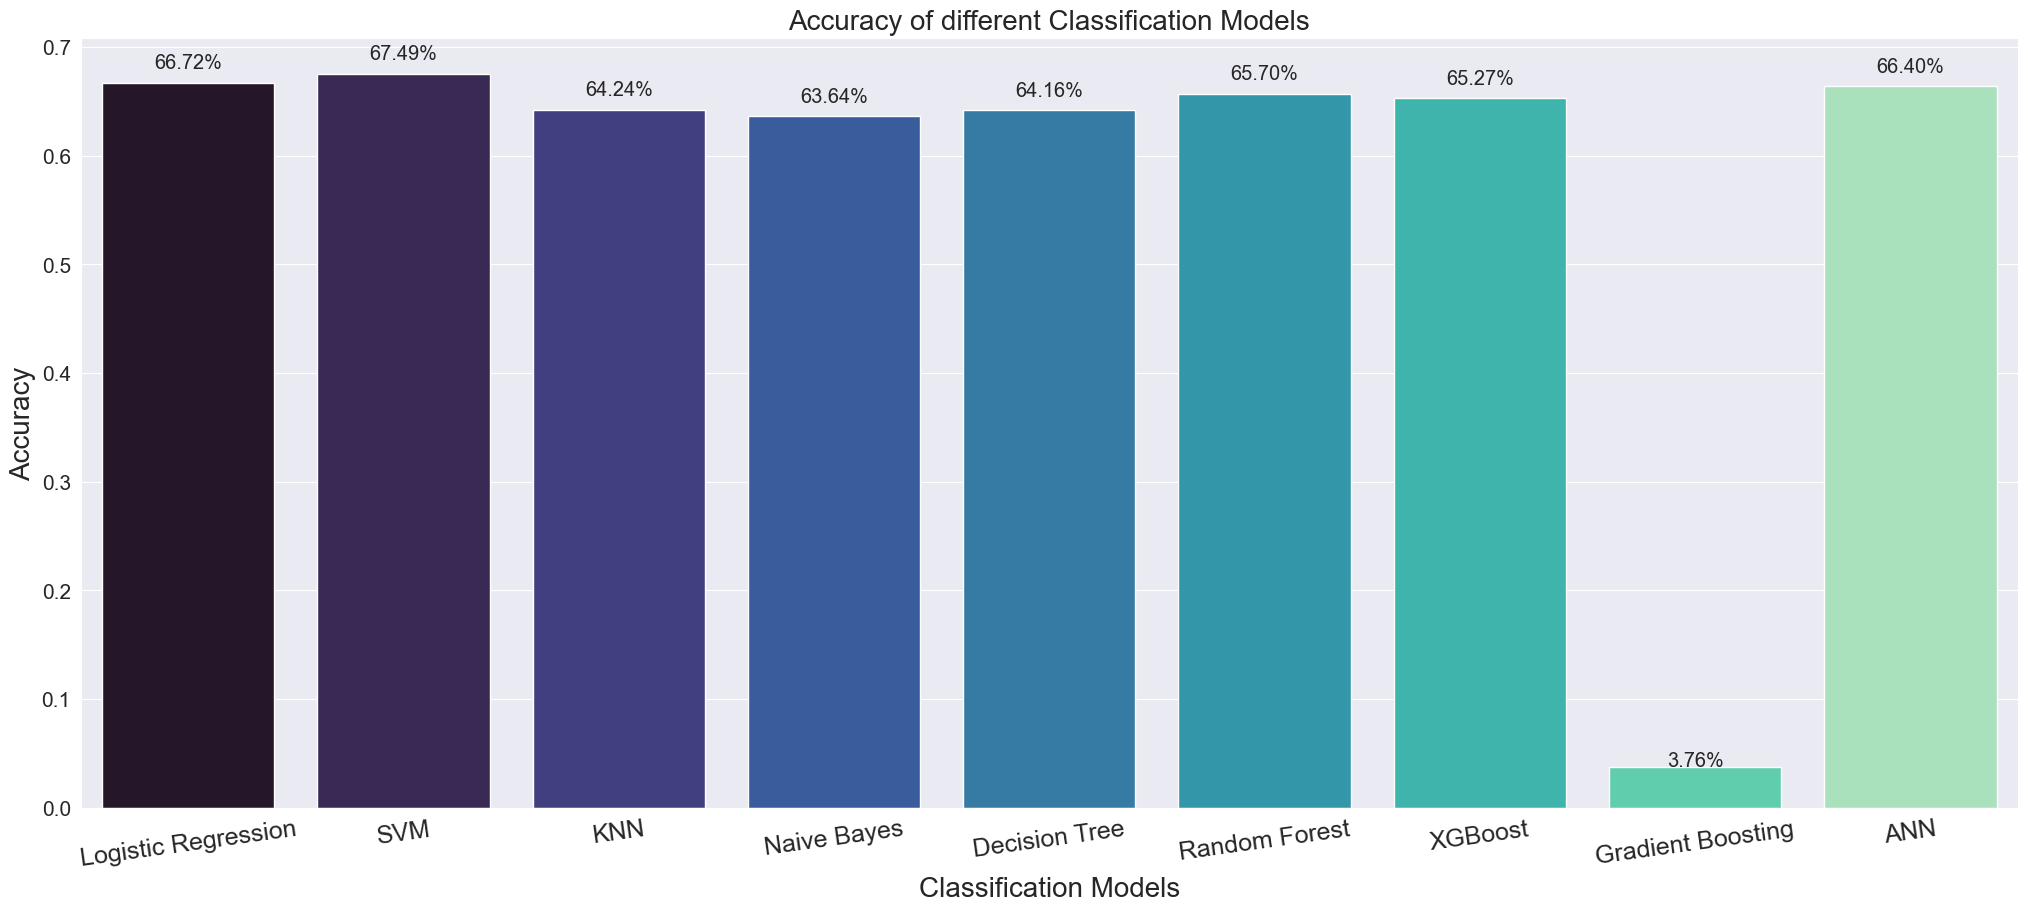

In [137]:
mylist=[]
mylist2=[]
mylist.append(lrAcc)
mylist2.append("Logistic Regression")
mylist.append(svmAcc)
mylist2.append("SVM")
mylist.append(knnAcc)
mylist2.append("KNN")
mylist.append(nbAcc)
mylist2.append("Naive Bayes")
mylist.append(dtAcc)
mylist2.append("Decision Tree")
mylist.append(rfAcc)
mylist2.append("Random Forest")
mylist.append(xgbAcc)
mylist2.append("XGBoost")
mylist.append(gbcAcc)
mylist2.append("Gradient Boosting")
mylist.append(ANNAcc)
mylist2.append("ANN")
plt.rcParams['figure.figsize'] = 8,6
sns.set_style("darkgrid")
plt.figure(figsize = (25,10))
ax = sns.barplot(x = mylist2, y = mylist, palette = "mako", saturation = 1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 18, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 15)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()